# 3- Modelo de Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
# carga de datos

df = pd.read_csv('AbandonoProcesado.csv')
df_ml = df.copy()

In [23]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   edad                      1470 non-null   int64 
 2   abandono                  1470 non-null   int64 
 3   viajes                    1470 non-null   object
 4   departamento              1470 non-null   object
 5   distancia_casa            1470 non-null   int64 
 6   educacion                 1470 non-null   object
 7   carrera                   1470 non-null   object
 8   satisfaccion_entorno      1470 non-null   object
 9   implicacion               1470 non-null   object
 10  nivel_laboral             1470 non-null   int64 
 11  puesto                    1470 non-null   object
 12  satisfaccion_trabajo      1470 non-null   object
 13  estado_civil              1470 non-null   object
 14  salario_mes             

### PREPARACIÓN DE LOS DATOS PARA LA MODELIZACIÓN

In [15]:
from sklearn.preprocessing import OneHotEncoder

#Categóricas
cat = df_ml.select_dtypes('O')

#Instanciamos
ohe = OneHotEncoder(sparse_output = False)

#Entrenamos
ohe.fit(cat)

#Aplicamos
cat_ohe = ohe.transform(cat)

#Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)



In [16]:
cat_ohe

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### Dataframe final

Seleccionamos las variables numéricas para poder juntarlas a las cat_hoe

In [24]:
num = df.select_dtypes('number').reset_index(drop = True)

Las juntamos todas en el dataframe final

In [26]:
df_ml = pd.concat([cat_ohe,num], axis = 1)
df_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,nivel_laboral,salario_mes,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2,5993,8,11,0,8,0,6,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2,5130,1,23,1,10,3,10,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,2090,6,15,0,7,3,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,2909,1,11,0,8,3,8,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,3468,9,12,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2,2571,4,17,1,17,3,5,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3,9991,4,15,1,9,5,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2,6142,1,20,1,6,0,6,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,5390,2,14,0,17,3,9,0,8


### DISEÑO DE LA MODELIZACIÓN

#### Separación predictoras y target

In [27]:
x = df_ml.drop(columns='abandono')
y = df_ml['abandono']

#### Separación train y test

In [28]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3) 

### ENTRENAMIENTO DEL MODELO SOBRE TRAIN

In [29]:
from sklearn.tree import DecisionTreeClassifier

#Instanciar
ac = DecisionTreeClassifier(max_depth=4)

#Entrenar
ac.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=4)

### PREDICCIÓN Y VALIDACIÓN SOBRE TEST

In [30]:
# Predicción
pred = ac.predict_proba(test_x)[:, 1]
pred[:20]

array([0.04098361, 0.14285714, 0.04098361, 0.04098361, 0.04098361,
       0.15048544, 0.08396947, 0.15048544, 0.15048544, 0.53125   ,
       0.04098361, 0.04098361, 0.09615385, 0.04098361, 0.09615385,
       0.07692308, 0.77142857, 0.09615385, 0.15048544, 0.15048544])

In [31]:
# Evaluación
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y,pred)

0.7632887517146776

### INTERPRETACIÓN

#### Diagrama del árbol

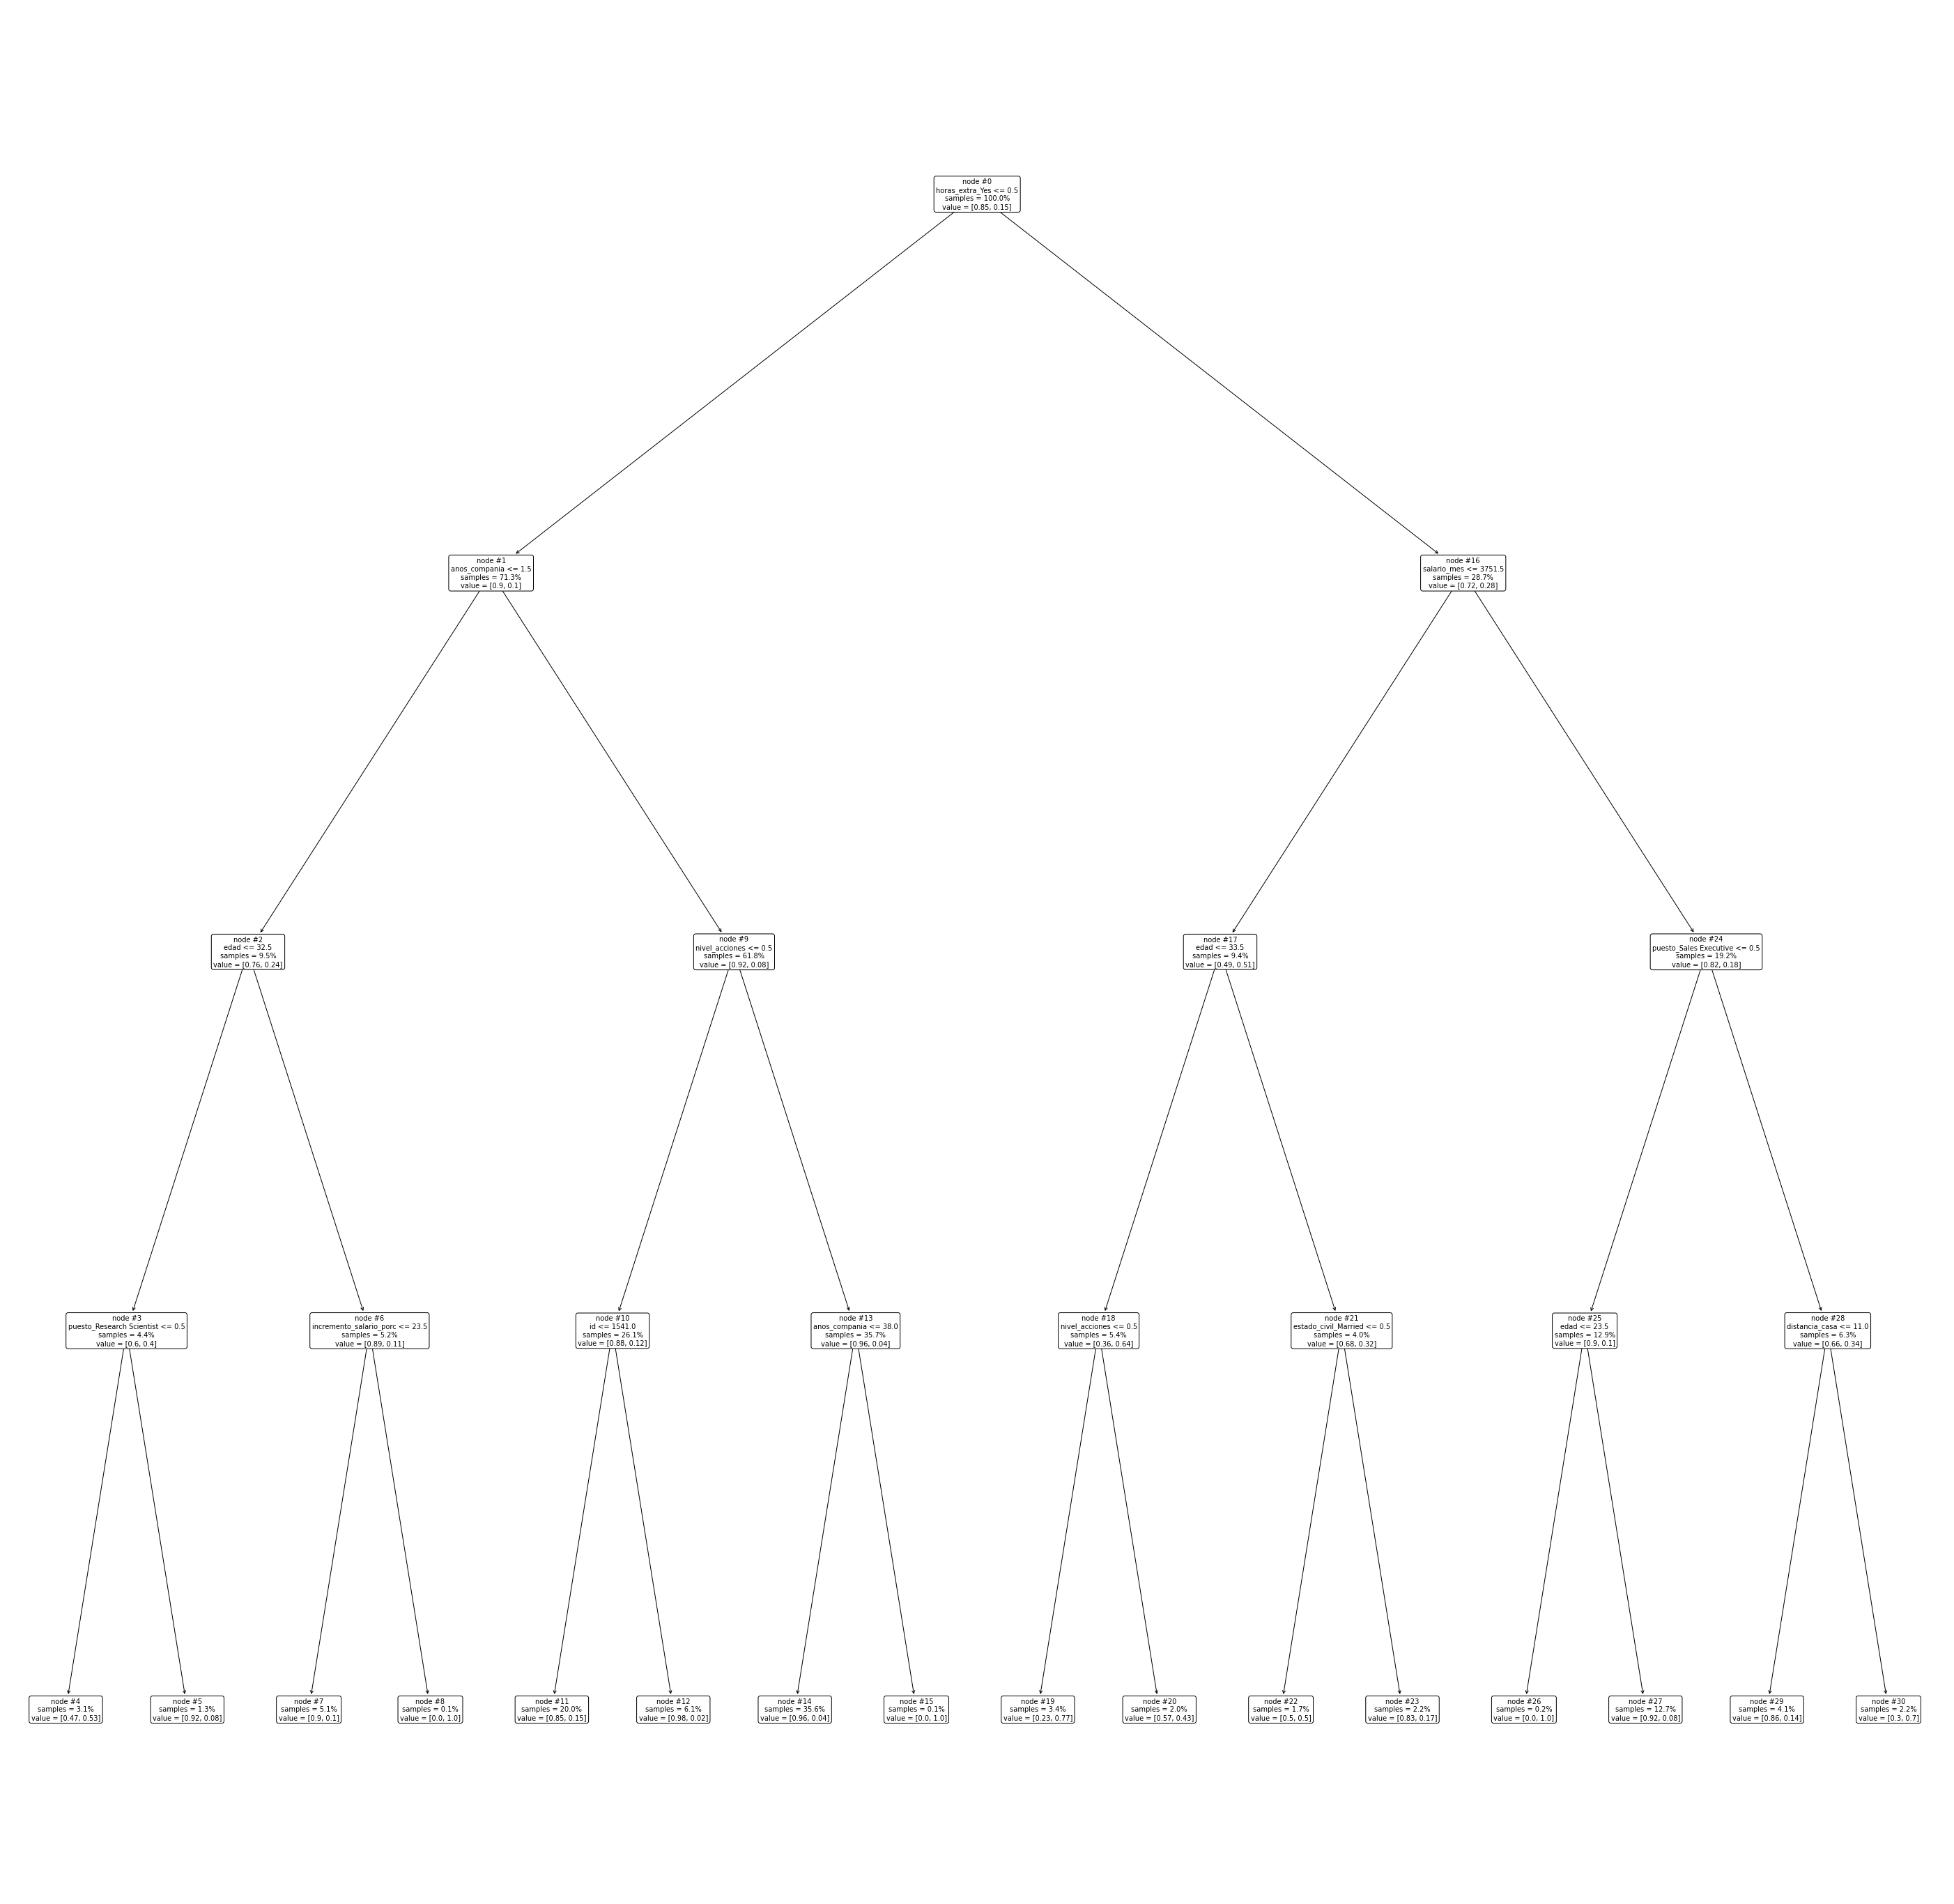

In [32]:
from sklearn.tree import plot_tree

plt.figure(figsize = (50,50))

plot_tree(ac,
          feature_names= test_x.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

#### Importancia de las variables

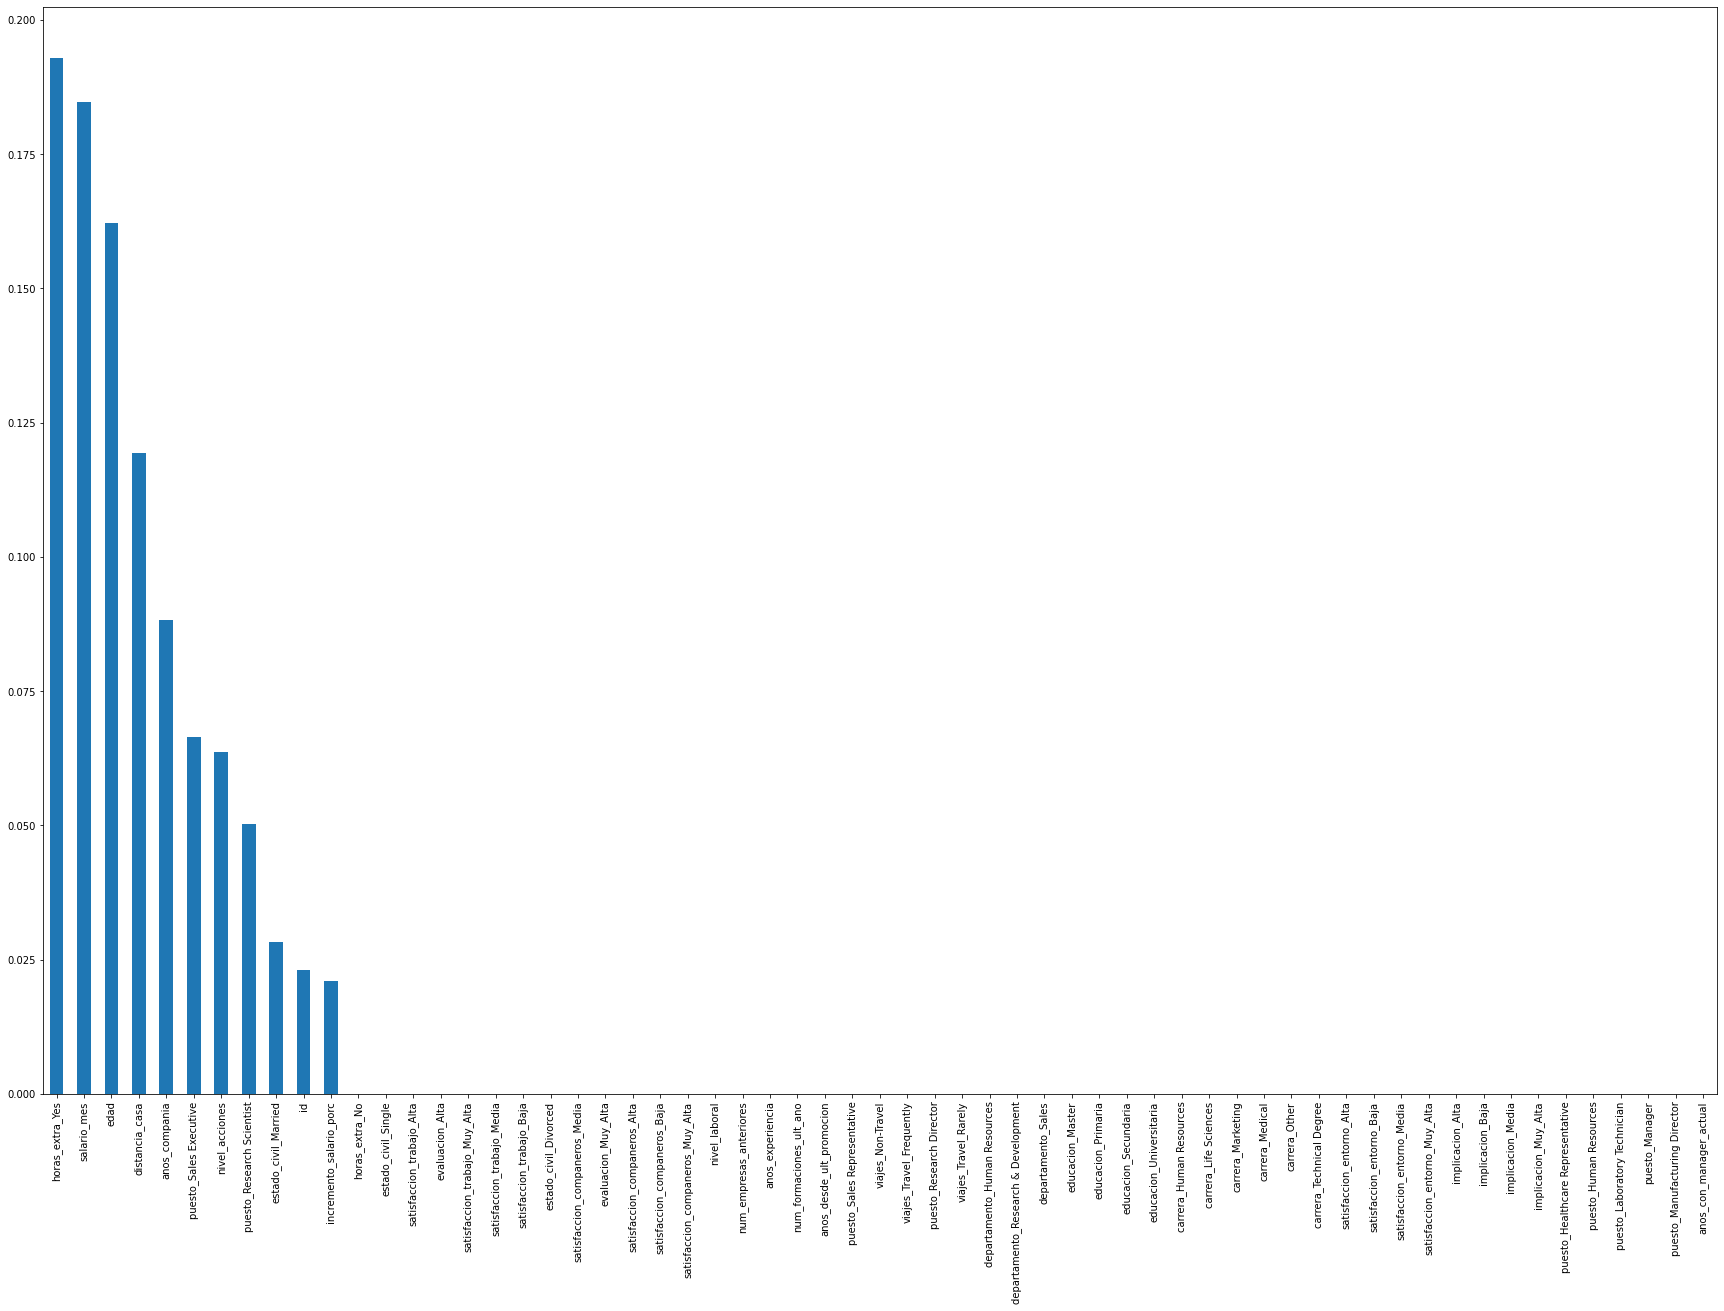

In [33]:

pd.Series(ac.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));


### EXPLOTACIÓN

Incoporación del scoring al dataframe principal

In [34]:
df['scoring_abandono'] = ac.predict_proba(df_ml.drop(columns = 'abandono'))[:, 1]

Ejemplo de los 10 empleados con mayor probabilidad de dejar la empresa

In [35]:
df.sort_values(by = 'scoring_abandono', ascending = False)[0:10]

,id,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,scoring_abandono
666,926,22,1,Travel_Rarely,Research & Development,3,Universitaria,Life Sciences,Media,Alta,...,19,Alta,Baja,1,4,3,3,0,2,1.000000
1201,1684,23,1,Travel_Rarely,Research & Development,8,Secundaria,Medical,Muy_Alta,Media,...,11,Alta,Baja,0,5,2,5,1,2,1.000000
126,165,58,1,Travel_Rarely,Research & Development,23,Universitaria,Medical,Muy_Alta,Alta,...,12,Alta,Muy_Alta,1,40,3,40,15,6,1.000000
700,977,58,1,Travel_Rarely,Research & Development,2,Universitaria,Technical Degree,Muy_Alta,Alta,...,24,Muy_Alta,Baja,0,7,4,1,0,0,1.000000
711,994,29,1,Travel_Rarely,Research & Development,10,Secundaria,Life Sciences,Muy_Alta,Media,...,20,Muy_Alta,Alta,0,3,5,0,0,0,0.771429
892,1248,19,1,Non-Travel,Research & Development,10,Secundaria,Medical,Baja,Media,...,25,Muy_Alta,Media,0,1,2,1,0,0,0.771429
673,939,33,0,Travel_Rarely,Research & Development,1,Secundaria,Other,Alta,Media,...,11,Alta,Media,0,6,1,3,0,2,0.771429
102,137,20,1,Travel_Frequently,Research & Development,6,Secundaria,Life Sciences,Muy_Alta,Media,...,18,Alta,Media,0,1,5,1,1,0,0.771429
688,959,19,1,Travel_Rarely,Sales,21,Secundaria,Other,Muy_Alta,Media,...,13,Alta,Media,0,1,3,1,0,0,0.771429
842,1175,28,1,Travel_Rarely,Research & Development,12,Universitaria,Life Sciences,Alta,Alta,...,11,Alta,Muy_Alta,0,1,4,1,0,0,0.771429


Ejemplo: riesgo de dejar la empresa por puesto de trabajo

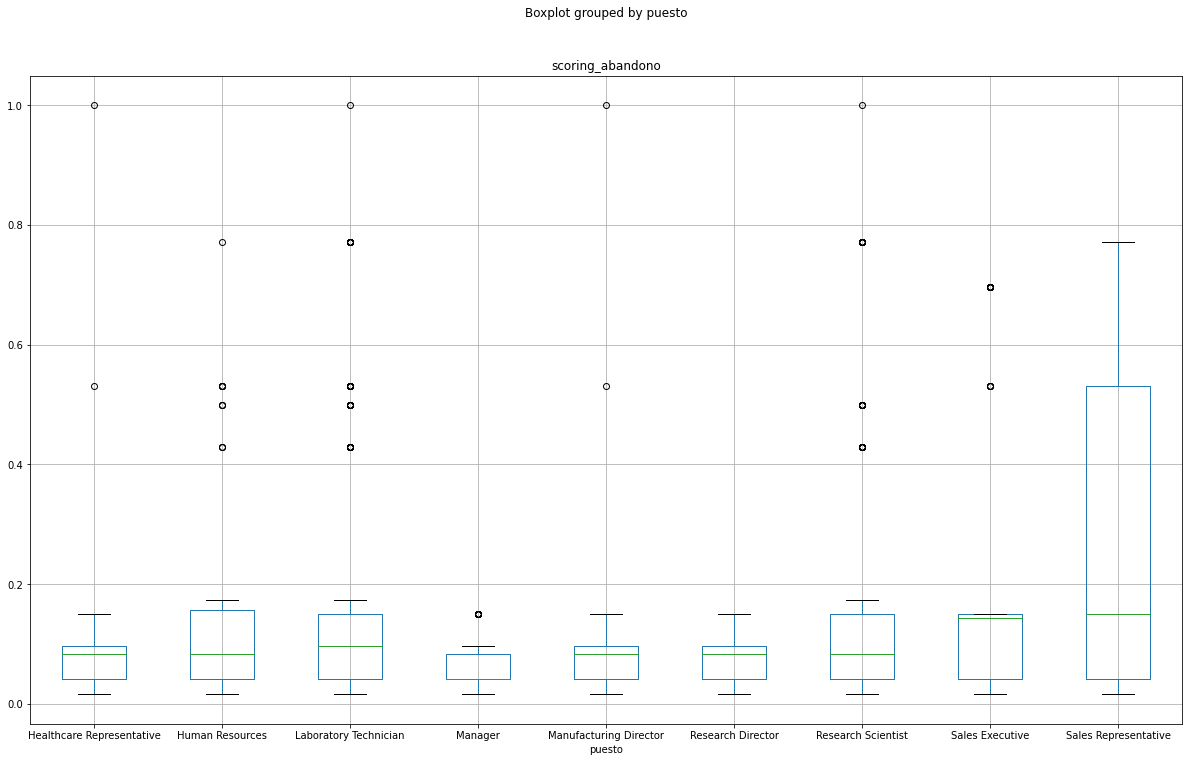

In [36]:
df.boxplot(column='scoring_abandono', by='puesto', figsize = (20,12));

### Exportación del resultado

In [39]:

df.to_csv('AbandonoScoring.xlsx') 
df.to_excel('AbandonoScoring.xlsx') 

